# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">عملیات بیتی (Bitwise Operations) و نقاب‌گذاری تصویر (Masking)</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در گام نخست اشکالی برای درک این عملیات ایجاد میکنیم.
<br/>
فعلا برای رسم اشکال در opencv نگران نباشید، در قسمت بعد و نوت بوک آدرس زیر کاملا تشریح میگردد:
</div>

[07-Drawing-and-annotating.ipynb](#)

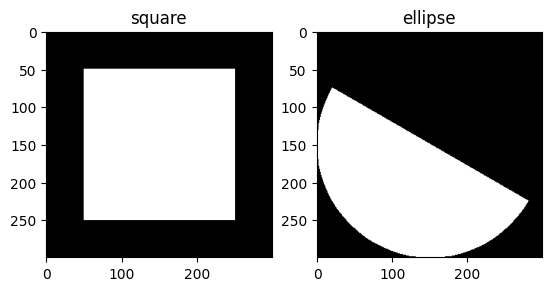

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# If you're wondering why only two dimensions, well this is a grayscale image,
# if we doing a colored image, we'd use
# rectangle = np.zeros((300, 300, 3),np.uint8)

# Making a sqare
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

#show
plt.subplot(121);plt.imshow(square,cmap='gray');plt.title("square");
plt.subplot(122);plt.imshow(ellipse,cmap='gray');plt.title("ellipse");


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">عملیات بیتی تصویر در OpenCV</div>
<ul>
    <li>bitwise_and</li>
    <li>bitwise_or</li>
    <li>bitwise_xor</li>
    <li>bitwise_not</li>
</ul>

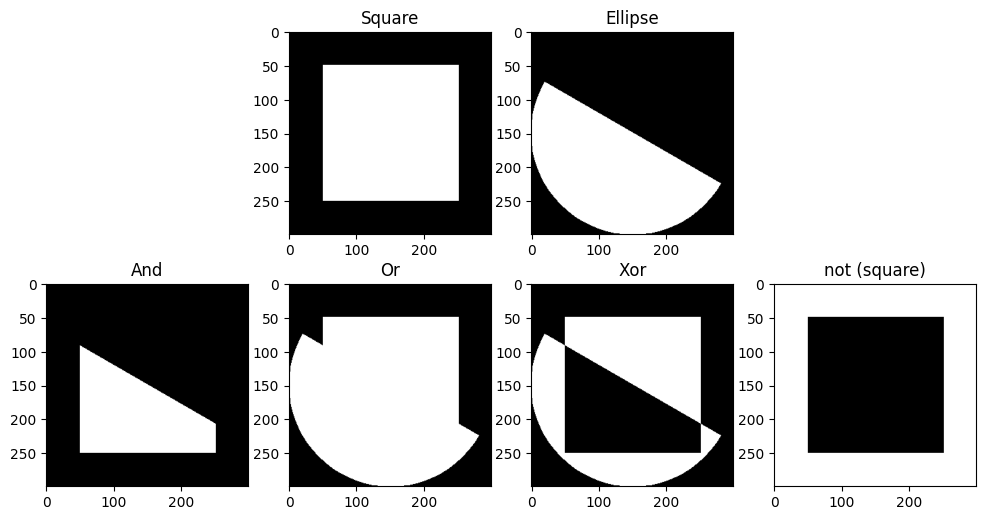

In [2]:
# Shows only where they intersect
bitwise_and = cv2.bitwise_and(square, ellipse)

# Shows where either square or ellipse is
bitwise_or = cv2.bitwise_or(square, ellipse)


# Shows where either exist by itself
bitwise_xor = cv2.bitwise_xor(square, ellipse)


# Shows everything that isn't part of the square
bitwise_not_sq = cv2.bitwise_not(square)

#show
plt.figure(figsize=[12,6])
plt.subplot(242);plt.imshow(square,cmap='gray');plt.title("Square");
plt.subplot(243);plt.imshow(ellipse,cmap='gray');plt.title("Ellipse");
plt.subplot(245);plt.imshow(bitwise_and,cmap='gray');plt.title("And");
plt.subplot(246);plt.imshow(bitwise_or,cmap='gray');plt.title("Or");
plt.subplot(247);plt.imshow(bitwise_xor,cmap='gray');plt.title("Xor");
plt.subplot(248);plt.imshow(bitwise_not_sq,cmap='gray');plt.title("not (square)");


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مثال عملی با تصویر رنگی</div>


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


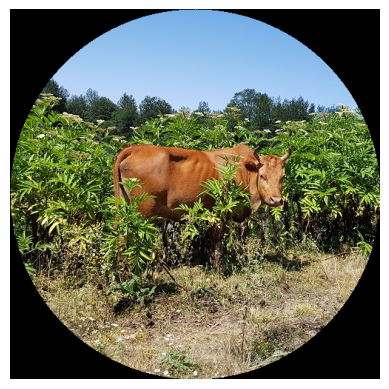

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# اتصال به گوگل درایو
drive.mount('/content/drive')

# مسیر جدید عکس در گوگل درایو
image_path = '/content/drive/MyDrive/images/input.jpg'

# خواندن تصویر
image = cv2.imread(image_path)
cropped = image[100:600 , 150:650]

# ساخت ماسک دایره‌ای
circle = np.zeros((500,500,3), np.uint8)
cv2.circle(circle, (250, 250), 250, (255,255,255), -1)

# بیت‌وایز AND برای اعمال ماسک
output_image = cv2.bitwise_and(cropped, circle)

# نمایش تصویر
plt.imshow(output_image[...,::-1])
plt.axis('off')
plt.show()


In [12]:
png_image = np.zeros((500,500,4), np.uint8)
png_image[:,:,0:3] = cropped
circle = np.zeros((500,500), np.uint8)
cv2.circle(circle, (250, 250), 250, (255,255,255), -1)
png_image[:,:,3]= circle
cv2.imwrite("caw.png", png_image)

True

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">  برای درک عملگر بیتی دو تصویر به مثال زیر توجه کنید </div>


In [13]:
square = np.zeros((10, 10), np.uint8)
cv2.rectangle(square, (2, 2), (8, 8), 2, -1) # 2 : 010

circle1 = np.zeros((10, 10), np.uint8)
cv2.circle(circle1, (5, 5), 2, 3, -1)  # 3 : 011


circle2 = np.zeros((10, 10), np.uint8)
cv2.circle(circle2, (5, 5), 2, 4, -1) # 4 : 100


output1 = cv2.bitwise_and(square, circle1)
output2 = cv2.bitwise_and(square, circle2)

print("--square--")
print(square)
print("--circle1--")
print(circle1)
print("--circle2--")
print(circle2)
print("--output1--")
print(output1)
print("--output2--")
print(output2)


--square--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
--circle1--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 3 3 3 0 0 0]
 [0 0 0 3 3 3 3 3 0 0]
 [0 0 0 0 3 3 3 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--circle2--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 4 4 4 0 0 0]
 [0 0 0 4 4 4 4 4 0 0]
 [0 0 0 0 4 4 4 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--output1--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 2 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--output2--
[[0 0 0 0 0 0 0 0